# Password Strength Detector with AI + GenAI
Welcome, Sea Cadets! In this notebook, you'll explore how machine learning (ML) can be used to detect whether a password is strong or weak. You'll also experience Generative AI (GenAI) as it explains the password's strength and gives tips to improve it.

Mission Goal: Build a model that analyzes passwords, then ask GenAI to give human-style advice.

## 🧾 Step 1: Import Relevent Libraries


In [ ]:
# 🚀 Step 1: Install & Import Libraries
#!pip install openai
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import string
import openai

## 🧾 Step 2: Create the Password Dataset

> Add blockquote



In [ ]:
# 📊 Step 2: Create a Sample Password Dataset
data = {
    'password': [
        'password', 'qwerty', 'Navy2024!', 'Phantom@R1s3!2024', 'G@lactic_Sh!eld2025',
        'Zx9!Tq8#Lp3@Cv7&', '123456', 'BravoZulu_2025!', 'ABcd@1234', '!S3aW0lf_C0vert99',
        'F!shHook#28SeCure!', 'Se@Cadet_P@ssW0rd!', 'Se@Cadet007', 'letmein',
        'StrongPass!2023', 'T1ger$h@rk!OPS2023', 'N@vSup3r$h1eld2025', 'iloveyou',
        'hello123', 'Sunshine@89', 'Str0ngB@tt@l!0n2024!'
    ],
    'strength': [
        0, 0, 1, 2, 2, 2, 0, 2, 1, 2,
        2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 2
    ]
}
df = pd.DataFrame(data)
df

,password,strength
0,password,0
1,qwerty,0
2,Navy2024!,1
3,Phantom@R1s3!2024,2
4,G@lactic_Sh!eld2025,2
5,Zx9!Tq8#Lp3@Cv7&,2
6,123456,0
7,BravoZulu_2025!,2
8,ABcd@1234,1
9,!S3aW0lf_C0vert99,2


## 🧪 Step 3: Extract Features from Passwords

In [ ]:
# 🔍 Step 3: Feature Engineering – Convert Passwords to Features
def extract_features(pw):
    return [
        len(pw),
        sum(c.isupper() for c in pw),
        sum(c.islower() for c in pw),
        sum(c.isdigit() for c in pw),
        sum(c in string.punctuation for c in pw)
    ]

X = df['password'].apply(extract_features).tolist()
y = df['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 🧠 Step 4: Train the Machine Learning Model
Precision - Accuracy - "When I fire, I better hit the right target."
recall - Coverage - ""I want to find every single enemy."
F1 Score - The harmonic mean of precision and recall = 1.0 (perfect).- a balance of both


In [ ]:
# 🔍 Step 3: Feature Engineering – Convert Passwords to Features
import string
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def extract_features(pw):
    return [
        len(pw),
        sum(c.isupper() for c in pw),
        sum(c.islower() for c in pw),
        sum(c.isdigit() for c in pw),
        sum(c in string.punctuation for c in pw)
    ]

X = df['password'].apply(extract_features).tolist()
y = df['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🧠 Step 4: Train the Model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

✅ Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



## 🎯 Step 5: Try Your Own Password
Enter a password and let the AI predict if it's strong or weak.

## 🧪 Step 6: Extract Features from Passwords

In [ ]:
# ✍️ Input your own password
your_pw = input("Enter a password: ")
your_features = extract_features(your_pw)
result = model.predict([your_features])[0]
#print("🧪 Result:", "Strong ✅" if result == 1 else "Weak ❌")
if result == 0:
    print("🟥 Weak Password ❌")
elif result == 1:
    print("🟨 Strong Password ✅")
elif result == 2:
    print("🟩 Very Strong Password 💪✅")

Enter a password: 56%^$%4ggYY^&%^&%
🟩 Very Strong Password 💪✅


## 📦 Step 7: Use GenAI to get real world feedback

In [ ]:
import openai
from google.colab import userdata

# 🔐 Replace this with your OpenAI API Key (store securely in real use)
# Use Colab's secrets manager for better security
openai.api_key = userdata.get('secretName')


def genai_feedback(pw, result):
    #prompt = f"The password '{pw}' was classified as {'strong' if result else 'weak'}. Explain why and give suggestions for improvement."
    prompt = f"The password '{pw}' was classified as "
    if result == 0:
      prompt += "'Weak'. Explain why and suggest 2 stronger alternatives."
    elif result == 1:
      prompt += "'Strong'. Explain why it's good and how it could be improved."
    else:
      prompt += "'Very Strong'. Explain what makes it excellent and how to maintain security habits."
    # Updated API call for openai>=1.0.0
    client = openai.OpenAI(api_key=openai.api_key)
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content

# Run this after the password test above
print("📣 GenAI Feedback:")
print(genai_feedback(your_pw, result))

📣 GenAI Feedback:
The password '56%^$%4ggYY^&%^&%' was classified as 'Very Strong' because it meets the criteria for a highly secure password. 

1. Length: The password is long, consisting of 18 characters, which makes it harder to guess or crack through brute force methods.

2. Complexity: The password includes a mix of uppercase letters, lowercase letters, numbers, and special characters, increasing its complexity and making it more difficult to crack.

3. Unpredictability: The combination of random characters and symbols in the password makes it unpredictable, further enhancing its security.

To maintain good security habits with passwords, it is important to follow these guidelines:

1. Create unique passwords for each account: Avoid using the same password for multiple accounts, as this increases the risk of a security breach if one password is compromised.

2. Use a password manager: Consider using a password manager to securely store and manage all your passwords. This can help 

## **Confusion Matrix – visualizing errors between classes:**


🧾 Dataset size: 21


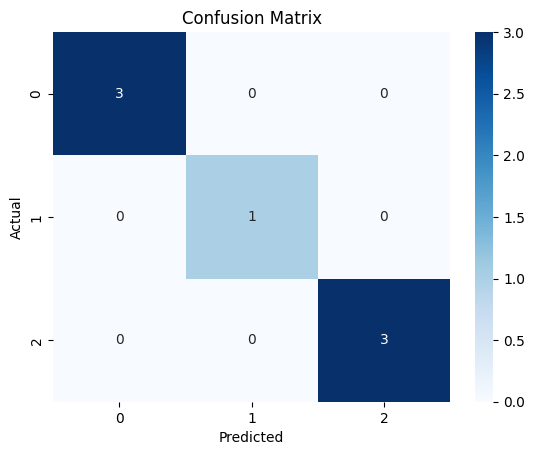

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print("🧾 Dataset size:", len(X))   # or len(df)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

---
### ✅ Mission Debrief:
- You trained an ML model to detect weak vs strong passwords.
- You used GenAI to get real-world feedback.
- You learned how AI works behind everyday security tools.

Great work, Cadets! 🫡